#### [Spearman Rank Coefficient]

- 광고비 <-> 웹사이트 방문자 수 : 비선형 단조 증가
- 현실에서는 광고비를 2배 쓰면 방문자가 반드시 2배 증가하지 않음
    * 증가하긴 하는데 증가폭은 점점 줄어드는 비선형 단조 증가 관계가 대부분

In [8]:
# =================================================
# 모듈 로딩
# =================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.stats import pearsonr, spearmanr

In [9]:
# 광고비 (100만원 단위)
ad_cost = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

# 방문자 수 : 앞 9개는 거의 직선, 마지막 1개만 '대박 캠페인'
visitors = np.array([1000, 2000, 3000, 4000, 5000, 
                     6000, 7000, 8000, 9000, 50000])

Pearson : 0.6660929560879213
Spearman : 0.9999999999999999


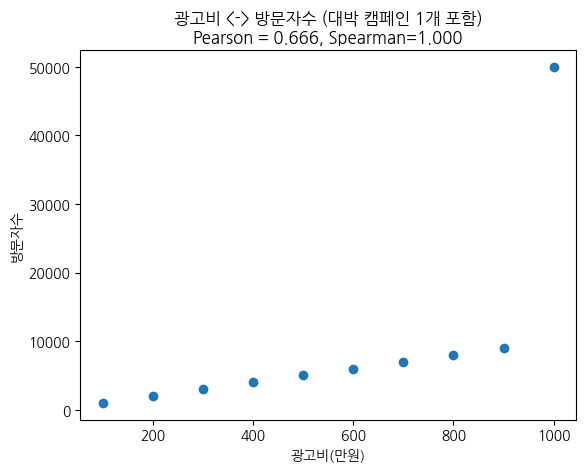

In [10]:
# 관계성 계산
pearson, _ = pearsonr(ad_cost, visitors)
spearman, _ = spearmanr(ad_cost, visitors)

# 시각화
plt.scatter(ad_cost, visitors)
plt.title(f"광고비 <-> 방문자수 (대박 캠페인 1개 포함)\n"
          f"Pearson = {pearson:.3f}, Spearman={spearman:.3f}")
plt.xlabel("광고비(만원)")
plt.ylabel("방문자수")

print("Pearson :", pearson)
print("Spearman :", spearman)

In [15]:
dataDF = pd.DataFrame({'ad_cost':ad_cost, 'visitors':visitors})
display(dataDF.corr(method='spearman'), dataDF.corr())

,ad_cost,visitors
ad_cost,1.0,1.0
visitors,1.0,1.0


,ad_cost,visitors
ad_cost,1.000000,0.666093
visitors,0.666093,1.000000


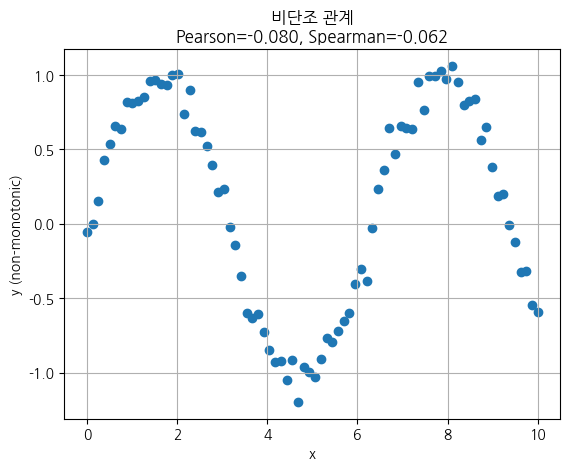

상관계수 비교 - 비단조 관계
* Pearson : -0.0801
* Spearman : -0.0620


In [ ]:
# =================================================
# 비단조 관계(non-monotonic)
#   y = sin(x) -> 올라갔다 내려가는 형태
# =================================================
# 임의의 데이터
x = np.linspace(0, 10, 80)
y_non = np.sin(x) + np.random.normal(scale=0.1, size=len(x))

# 관계성 값 계산
pearson_non, _ = pearsonr(x, y_non)
spearman_non, _ = spearmanr(x, y_non)

# 시각화
plt.figure()
plt.scatter(x, y_non)
plt.title(f"비단조 관계\nPearson={pearson_non:.3f}, Spearman={spearman_non:.3f}")
plt.xlabel("x")
plt.ylabel("y (non-monotonic)")
plt.grid(True)
plt.show()

# 수치만 따로 출력
print("상관계수 비교 - 비단조 관계")
print(f"* Pearson : {pearson_non:.4f}")
print(f"* Spearman : {spearman_non:.4f}")